The classes in this file implement several kinds of basic 2-alternative forced choice psychophysics exoeriments.  A stimulus is played to the user, and based on the user's answer a bigger or smaller stimulus is played, where bigger or smaller depends on the type of experiment.

Here are the classes:
* TestGUI: The basic UI for all experiments
    * Exp2AFC: Adds the Levitt threshold setting paradigm
        *   AudioExp2AFC: A simple pitch JND experiment
        *   TactorExp2AFC: A simple tactor threshold experiment
        *   TactorPhaseExp: Testing whether phase is perceptible

In [ ]:
# Copyright 2020 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License"); you may not
# use this file except in compliance with the License. You may obtain a copy of
# the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS, WITHOUT
# WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the
# License for the specific language governing permissions and limitations under
# the License.qqq

In [1]:
# https://ipython.org/ipython-doc/3/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt

import psycho_gui

In [3]:
# Basic GUI.  Just beep once for each trial number. Trial
# number goes up with each test answer.

test = psycho_gui.TestGui()
test.display_widgets()

In [4]:
# Make another instance to make sure they don't interfere.
test2 = psycho_gui.TestGui()
test2.display_widgets()

## Now add the 2AFC Logic

In [5]:
exp = psycho_gui.AudioExp2AFC(button_names=['First (up->down)', 'Second (down->up)'], 
                              title='This is a pitch JND experiment')
exp.display_widgets()

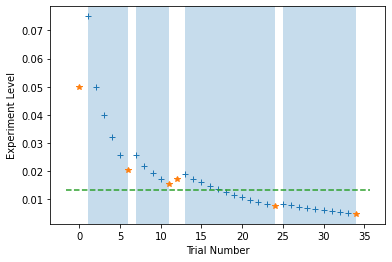

In [6]:
exp.levitt_exp.plot_response()
threshold = exp.levitt_exp.calculate_threshold()
plt.plot(plt.xlim(), [threshold, threshold], '--');

In [7]:
exp.levitt_exp.calculate_threshold()

0.013310083047508922

In [8]:
# Create a set of experiments at a range of stimulus frequencies.
audio_exp = {}
for f0 in [220,440]:
    audio_exp[int(f0)] = psycho_gui.AudioExp2AFC(button_names=['First (up->down)', 'Second (down->up)'], 
                                                 title=f'This is a {f0} pitch JND experiment',
                                                 f0=f0)
    audio_exp[int(f0)].display_widgets()

## Now try it with the Tactors

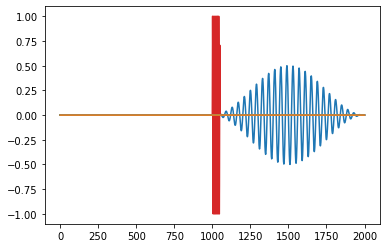

In [10]:
t = psycho_gui.TactorExp2AFC(f0=50, initial_level=0.5)
t.create_stimulus()
plt.plot(t.test_signal);

In [11]:
tactile_exp = {}
for f0 in [62.5, 125, 250, 500]:
    tactile_exp[int(f0)] = psycho_gui.TactorExp2AFC(title=f'This is a {f0} Tactor JND experiment',
                                                    f0=f0,
                                                    initial_level=0.5)
    tactile_exp[int(f0)].display_widgets()

In [32]:
tactor_f0s = sorted(tactile_exp.keys())
tactor_results = [tactile_exp[f0].levitt_exp.calculate_threshold() for f0 in tactor_f0s]

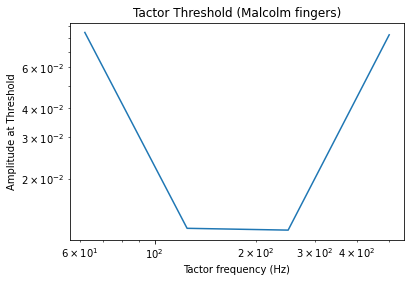

In [34]:
plt.loglog(tactor_f0s, tactor_results)
plt.title('Tactor Threshold (Malcolm fingers)')
plt.xlabel('Tactor frequency (Hz)')
plt.ylabel('Amplitude at Threshold');

In [43]:
tactor_exps = {}
for f0 in [62.5, 125, 250, 500]:
    tactor_exps[int(f0)] = psycho_gui.TactorExp2AFC(initial_level=0.5, 
                                                    f0=f0,
                                                    title=f'Which segment at {f0} has the texture?', 
                                                    mask_level=0,
                                                    click_channel=2,
                                                    stim_channel=4,
                                                    mask_channel=5)
    tactor_exps[int(f0)].display_widgets()

In [37]:
tactor_masks = {}
f0 = 125
for mask_channel in [5, 7]:
    tactor_masks[mask_channel] = psycho_gui.TactorExp2AFC(initial_level=0.5, 
                                                          f0=f0,
                                                          title=f'Which segment {f0},{mask_channel} has the texture?', 
                                                          mask_level=0.25,
                                                          click_channel=2,
                                                          stim_channel=4,
                                                          mask_channel=mask_channel)
    tactor_masks[mask_channel].display_widgets()

In [195]:
tactor_masks[12] = tactor_exps[f0]

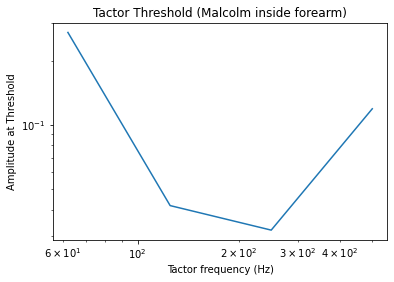

In [200]:
f0s = sorted(tactor_exps.keys())
f0_results = [tactor_exps[f0].levitt_exp.calculate_threshold() for f0 in f0s]
plt.loglog(f0s, f0_results)
plt.title('Tactor Threshold (Malcolm inside forearm)')
plt.xlabel('Tactor frequency (Hz)')
plt.ylabel('Amplitude at Threshold');

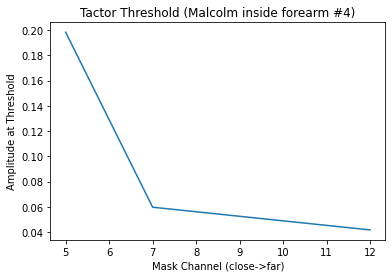

In [203]:
mask_channels = sorted(tactor_masks.keys())
mask_results = [tactor_masks[channel].levitt_exp.calculate_threshold() for channel in mask_channels]
plt.plot(mask_channels, mask_results)
plt.title('Tactor Threshold (Malcolm inside forearm #4)')
plt.xlabel('Mask Channel (close->far)')
plt.ylabel('Amplitude at Threshold');

## Tactor Phase Experiment

In [35]:
phase_exps = {}
for f0 in [32, 125, 500]:
    phase_exps[int(f0)] = psycho_gui.TactorPhaseExp(initial_level=0.5, 
                                                    f0=f0, 
                                                    stim_channel=2,
                                                    stim2_channel=7,
                                                    mask_level=0)
    phase_exps[int(f0)].display_widgets()

In [12]:
exp = psycho_gui.TactorPhaseExp(stim_channel=2, stim2_channel=7, initial_level=0.5)
exp.play_widget()